In [1]:
import pandas as pd
import numpy as np
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
humidity=['High', 'High','High','High','Normal','Normal','Normal','High', 'Normal','Normal','Normal','High','Normal','High'] 
windy=['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak','strong']


play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']



In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
weather=le.fit_transform(weather)
temp=le.fit_transform(temp)
humidity=le.fit_transform(humidity)
windy=le.fit_transform(windy)

y=le.fit_transform(play)

In [4]:
x=tuple(zip(weather,temp,humidity,windy))
display(x)

((2, 1, 0, 1),
 (2, 1, 0, 0),
 (0, 1, 0, 1),
 (1, 2, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (0, 0, 1, 0),
 (2, 2, 0, 1),
 (2, 0, 1, 1),
 (1, 2, 1, 1),
 (2, 2, 1, 0),
 (0, 2, 0, 0),
 (0, 1, 1, 1),
 (1, 2, 0, 0))

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [30]:
testx=[1,1,0,1]
pre=model.predict([testx])
pre

array([0])

In [32]:
pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt
cnf=confusion_matrix(y_test,pred)
cnf

array([[1, 1],
       [1, 2]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


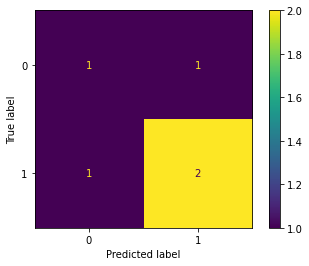

In [34]:
plot_confusion_matrix(model,x_test,y_test)

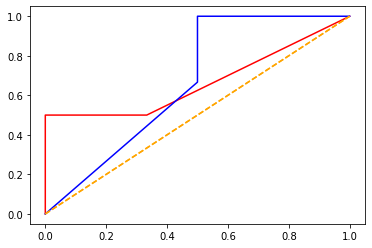

In [36]:
from sklearn.metrics import roc_curve
tpr={}
fpr={}
thresh={}
y_proba=model.predict_proba(x_test)
for i in range(2):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,y_proba[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],linestyle='-',c='red')
plt.plot(fpr[1],tpr[1],linestyle='-',c='blue')
plt.plot([[0,0],[1,1]],linestyle='--',c='orange')